<a href="https://colab.research.google.com/github/codingshinobi/cpython/blob/master/predict_future_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improting pre-requisites and libraries

In [1]:
import pandas as pd # pandas for the tabular data frames
import numpy as np # for all the numbers
import matplotlib.pyplot as plt # matplotlib for data visualizations - charts, plots, graphs
import seaborn as sns
import time

Importing the datasets

In [2]:
# the main training dataset
train_df = pd.read_csv(r"E:\DATASETS\sales_train.csv")  

# The test dataset where data will be predicted 
test_df = pd.read_csv(r"E:\DATASETS\test.csv")

#the extra help data on shops
shops_df = pd.read_csv(r"E:\DATASETS\shops.csv")

# Data on items
items_df = pd.read_csv(r"E:\DATASETS\items.csv")

# item categories
item_cat_df = pd.read_csv(r"E:\DATASETS\item_categories.csv")

Analyzing, visualizing, cleaning the train dataset


In [3]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
print("Shape of the data Set is :  ",train_df.shape)
print("Size of the data Set is  :  ",train_df.size)

Shape of the data Set is :   (2935849, 6)
Size of the data Set is  :   17615094


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


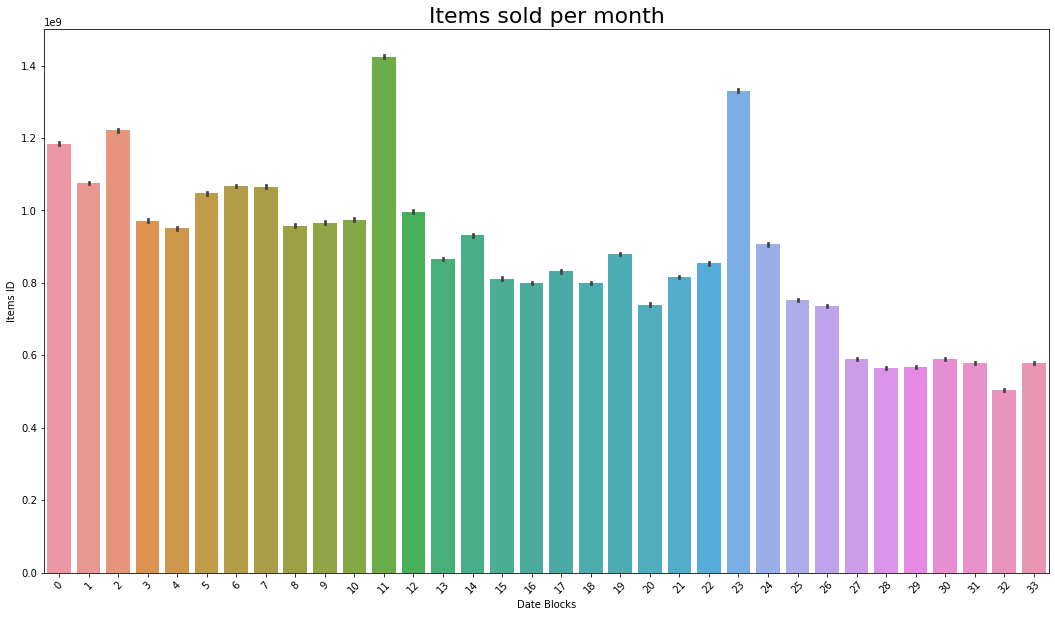

In [8]:
# Graph showing item sales per month
plt.figure(figsize= (18,10))
plt.title('Items sold per month', fontsize=22)
ax= sns.barplot(x='date_block_num', y= 'item_id', data=train_df, estimator=np.sum)
ax= ax.set(xlabel = 'Date Blocks', ylabel= 'Items ID' )
plt.xticks(rotation=45)
plt.show()

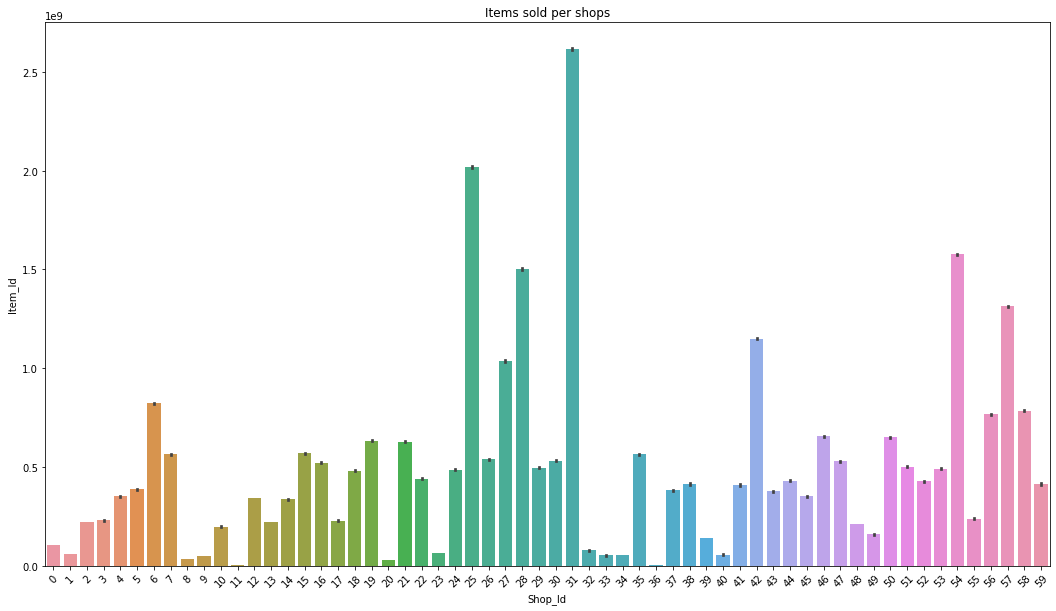

In [9]:
# This vizualization shows items sold in shops
plt.figure(figsize=(18,10))
plt.title('Items sold per shops')
ax = sns.barplot(x= 'shop_id', y = 'item_id', data=train_df, estimator = np.sum)
ax = ax.set(xlabel = 'Shop_Id', ylabel = 'Item_Id' )
plt.xticks(rotation=45)
plt.show()

Looking deeper into the shops dataset


In [10]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
shops_df['shop_name']

0                       !Якутск Орджоникидзе, 56 фран
1                       !Якутск ТЦ "Центральный" фран
2                                    Адыгея ТЦ "Мега"
3                      Балашиха ТРК "Октябрь-Киномир"
4                            Волжский ТЦ "Волга Молл"
5                              Вологда ТРЦ "Мармелад"
6                          Воронеж (Плехановская, 13)
7                              Воронеж ТРЦ "Максимир"
8                        Воронеж ТРЦ Сити-Парк "Град"
9                                   Выездная Торговля
10                         Жуковский ул. Чкалова 39м?
11                         Жуковский ул. Чкалова 39м²
12                                Интернет-магазин ЧС
13                                Казань ТЦ "Бехетле"
14                            Казань ТЦ "ПаркХаус" II
15                               Калуга ТРЦ "XXI век"
16                                   Коломна ТЦ "Рио"
17                      Красноярск ТЦ "Взлетка Плаза"
18                          

In [12]:
shops_df["shop_id"].count()

60

In [13]:
shops_df = shops_df.drop_duplicates(subset='shop_id')

In [14]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [15]:
shops_df["shop_id"].count()

60

Analysing and cleaning items dataset.

In [16]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [17]:
items_df['item_name'].nunique()

22170

Analysing item_cat dataset.

In [18]:
# let's have a look at the item_category dataset
item_cat_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [19]:
# look at the item_category_name 
item_cat_df['item_category_name'].count()

84

In [20]:
# Will have to create a new column named category which is split by the str(-)
item_cat_df['category'] = item_cat_df['item_category_name'].str.split('-')
item_cat_df.head()

,item_category_name,item_category_id,category
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]"
1,Аксессуары - PS2,1,"[Аксессуары , PS2]"
2,Аксессуары - PS3,2,"[Аксессуары , PS3]"
3,Аксессуары - PS4,3,"[Аксессуары , PS4]"
4,Аксессуары - PSP,4,"[Аксессуары , PSP]"


In [21]:
# create a new column by type and strip the first part of the category
item_cat_df['type']= item_cat_df['category'].apply(lambda x: x[0].strip())
item_cat_df.head()

,item_category_name,item_category_id,category,type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары


In [22]:
# Create a new column by name sub type and split the second part of the category 
item_cat_df['sub_type'] = item_cat_df['category'].apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_cat_df.head()

,item_category_name,item_category_id,category,type,sub_type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,PS2
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,PS3
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,PS4
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,PSP


In [23]:
# now that item_category_name and category columns have become useless we'll drop them
item_cat_df.drop(['item_category_name', 'category'],inplace=True, axis=1)

In [24]:
print("    Unique Types: ",item_cat_df['type'].nunique())
print("Unique Sub Types: ",item_cat_df['sub_type'].nunique())

    Unique Types:  20
Unique Sub Types:  65


[]

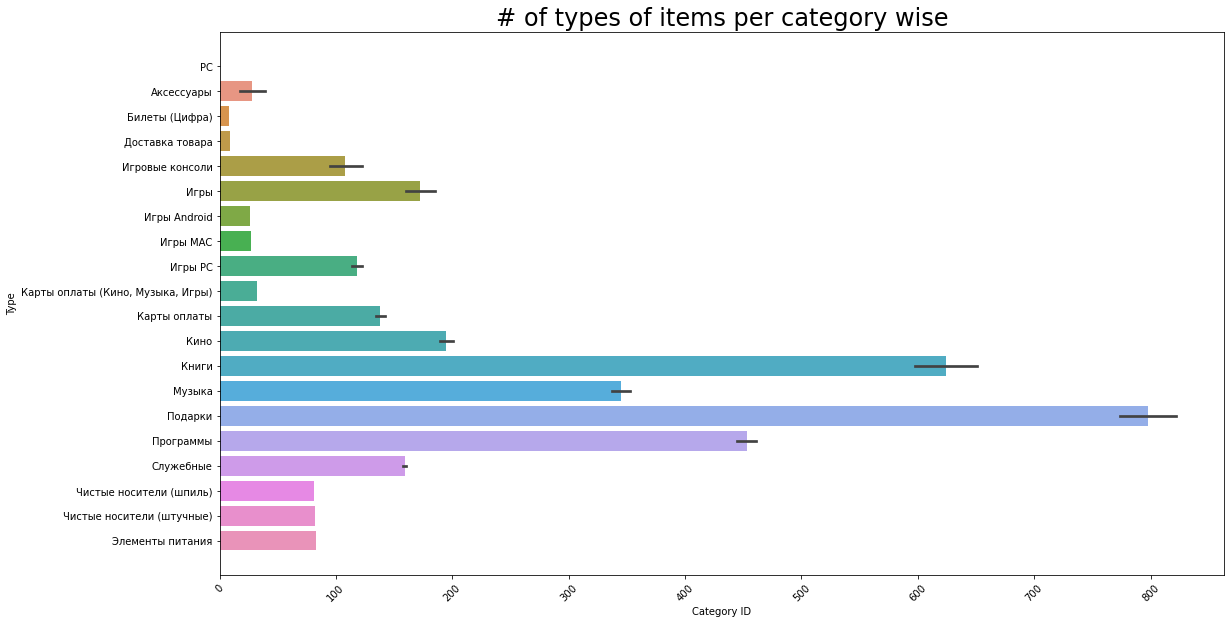

In [25]:
# this plot is to show the item category data with respect to types of products
plt.figure(figsize = (18,10))
plt.title('# of types of items per category wise', fontsize=24)
ax = sns.barplot(x = 'item_category_id', y='type', data= item_cat_df, 
                 estimator = np.sum)
ax = ax.set(xlabel = 'Category ID', ylabel='Type')
plt.xticks(rotation=45)
plt.plot()

Merging datasets to make master dataset


In [26]:
# we will merge train, items datsets and call it master dataset
master_data = pd.merge(train_df, items_df, how = 'left', on = 'item_id')
master_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [27]:
# also merge item_category dataset
master_data = pd.merge(master_data, item_cat_df, how = 'left', on = 'item_category_id')

# I will also merge the shops dataset
master_data = pd.merge(master_data, shops_df, how = 'left', on = 'shop_id')

print("shape:", master_data.shape)
print("size:", master_data.size)

shape: (2935849, 11)
size: 32294339


In [28]:
master_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,type,sub_type,shop_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино,Blu,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка,Винил,"Москва ТРК ""Атриум"""
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка,Винил,"Москва ТРК ""Атриум"""
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка,Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка,CD фирменного производства,"Москва ТРК ""Атриум"""


Grouping the datset by month, shop id and Item id and naming it month dataset


In [29]:
# Grouping data by month, shop id and Item ID
month = master_data.groupby(['date_block_num','shop_id','item_id']).agg({'item_price':'mean','item_cnt_day':'sum'}).reset_index()

In [31]:
# Combining the data frames

# Merge data with item 
month = pd.merge(month,items_df,how='left',on='item_id')

# Merge data with item categories 
month = pd.merge(month, item_cat_df,how='left',on='item_category_id')

# merge data with shops

month = pd.merge(month, shops_df, how='left',on='shop_id')

In [32]:
# lets look at the size and shape of month data 
print(" Shape: ", month.shape)
print("  Size: ", month.size)

 Shape:  (1609124, 10)
  Size:  16091240


In [33]:
# Create a new colums called total sales 
month['tota_sales'] = month['item_price']*month['item_cnt_day']

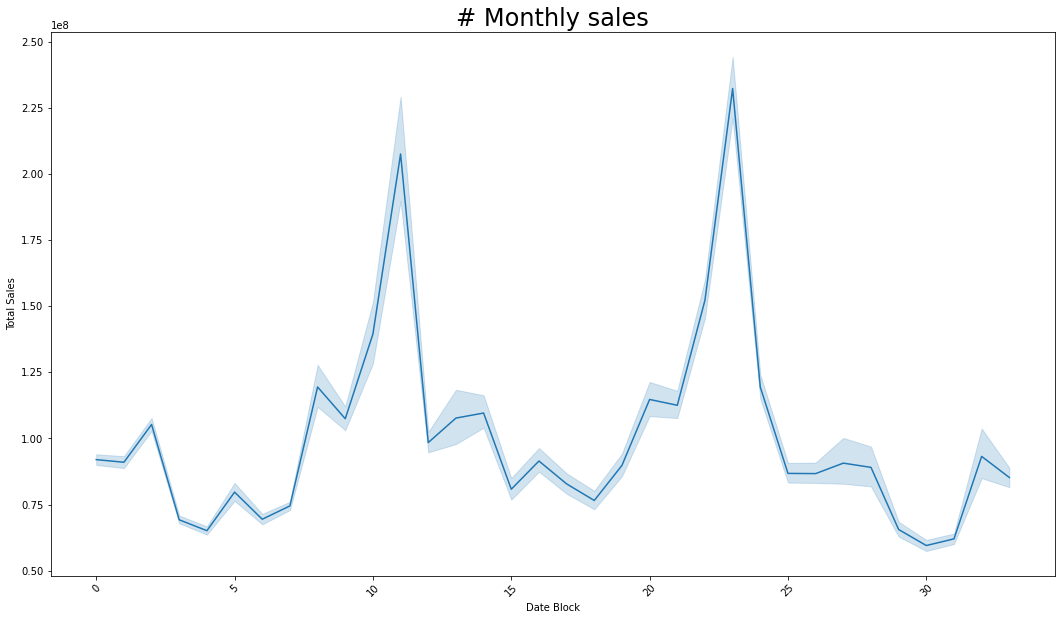

In [34]:
# Plot a line graph to show the monthly sales 
plt.figure(figsize = (18,10))
plt.title('# Monthly sales', fontsize=24)
ax = sns.lineplot(x='date_block_num', y='tota_sales', data=month, estimator=np.sum)
ax = ax.set(xlabel='Date Block', ylabel='Total Sales')
plt.xticks(rotation=45)

plt.show() 

In [35]:
# Create a column called month
month['month']= month['date_block_num'].apply(lambda month: (month+1)%12)

In [36]:
# Dummifying categorical columns 

# First let us work on shop 
month = pd.concat([month, pd.get_dummies(month['shop_id'],drop_first=True, prefix='shop_')], axis=1)

# Let us work on type 

month = pd.concat([month, pd.get_dummies(month['type'],drop_first=True, prefix='type')], axis=1)

# Finally work on sub type 

month = pd.concat([month, pd.get_dummies(month['sub_type'],drop_first=True, prefix='sub_type')], axis=1)

# lets look at the size and shape of month data 
print(" Shape: ", month.shape)
print("  Size: ", month.size)

 Shape:  (1609124, 154)
  Size:  247805096


In [44]:
month.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,type,sub_type,shop_name,...,sub_type_Стандартные издания,sub_type_Сувениры,sub_type_Сувениры (в навеску),"sub_type_Сумки, Альбомы, Коврики д/мыши",sub_type_Фигурки,sub_type_Художественная литература,sub_type_Цифра,sub_type_Чистые носители (шпиль),sub_type_Чистые носители (штучные),sub_type_Элементы питания
0,0,0,32,221.0,6.0,1+1,40,Кино,DVD,"!Якутск Орджоникидзе, 56 фран",...,0,0,0,0,0,0,0,0,0,0
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино,Blu,"!Якутск Орджоникидзе, 56 фран",...,0,0,0,0,0,0,0,0,0,0
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино,DVD,"!Якутск Орджоникидзе, 56 фран",...,0,0,0,0,0,0,0,0,0,0
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино,DVD,"!Якутск Орджоникидзе, 56 фран",...,0,0,0,0,0,0,0,0,0,0
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка,MP3,"!Якутск Орджоникидзе, 56 фран",...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Getting the names of feature columns for shop, type and sub_type 

# Defining shop column 

shop_col = [col for col in month.columns if 'shop__' in col]

# Defining type column 

type_col = [col for col in month.columns if 'type_' in col]

# Defining sub_type column 

sub_type_col = [ col for col in month.columns if 'sub_type_' in col]

In [45]:
# defining features and target
features = ['month', 'shop_id', 'item_id', 'item_price'] + type_col + sub_type_col
targets = ['item_cnt_day']

In [57]:
# Defining features and target 
features = ['month', 'shop_id','item_id', 'item_price'] + type_col + sub_type_col
target = ['item_cnt_day']


In [59]:
# Setup for feature and target variable
X_feature = month[features].fillna(value=0)
Y_target = month[target].fillna(value=0)

# Split and train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size=0.3, random_state=0)

In [60]:
# Fitting Linear Regression Model 

# Get lr function by importing from sklearn 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the lr model on the training data 

lr.fit(X_train,Y_train)

LinearRegression()

In [62]:
lr.score(X_train,Y_train)

0.2426584703435628

In [63]:
test_df.fillna(0)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


making changes in test dataset

In [65]:
test_df['date_num_block'] = 34
test_df['month'] = 11

In [67]:
item_price = month[['item_id', 'item_price']].groupby('item_id')['item_price'].mean().reset_index()

In [68]:
# merge the test dataframe

# merge test and item price dataframes
test_df = pd.merge(test_df, item_price, how='left', on = 'item_id')

# merge test and items dataframes
test_df = pd.merge(test_df, items_df, how='left', on = 'item_id')

# merge test and item categories dataframes
test_df = pd.merge(test_df, item_cat_df, how='left', on = 'item_category_id')

# merge test and shops datasets
test_df = pd.merge(test_df, shops_df, how= 'left', on = 'shop_id')


In [81]:
# Dummifying the categorical columns to get the test on shop, type and sub_type 

# Creating dummies for shop 
df_test = pd.concat([test_df, pd.get_dummies(test_df['shop_id'], drop_first=True, prefix='shop_')], axis=1)

## Creating dummies for type
df_test = pd.concat([test_df, pd.get_dummies(test_df['type'], drop_first=True, prefix='type')], axis=1)

## Creating dummies for sub_type
df_test = pd.concat([test_df, pd.get_dummies(test_df['sub_type'], drop_first=True, prefix='sub_type')], axis=1)

In [82]:
# Getting the names of the feature columns

# Collecting shop feature names
df_test_shop_col = [col for col in df_test.columns if 'shop__' in col]

# Collecting type feature names
df_test_type_col = [col for col in df_test.columns if 'type_' in col]

# Collecting sub_type feature names
df_test_sub_type_col = [col for col in df_test.columns if 'sub_type_' in col]

In [83]:
# Creating features for test data 
df_test_features = ['month', 'item_id' + 'shop_id', 'item_price'] + df_test_type_col + df_test_sub_type_col


In [88]:
#getting common features 
common_features = list(set(features) & set(df_test_features)) 
print(f"Number of common features: {len(common_features)}")

Number of common features: 50


In [89]:
# verify if the item_price is available in common features 
'item_price' in common_features

True

In [91]:
# Preparing data for modeling

# Setting feature and target variables
X = month[common_features].fillna(value=0)
y = month[target].fillna(value=0)

## Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [92]:
## Getting LR function
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Fitting on training data
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
lr.score(X_test, y_test)


0.24903894955725325

In [94]:
test_df = test_df.fillna(0)

In [95]:
lr.predict(test_df[common_features])

KeyError: ignored

In [108]:
test_df['preds'] = lr.predict(test_df[common_features])

KeyError: ignored

In [109]:
preds = test_df[['ID', 'preds']]
preds.columns = ['ID', 'item_cnt_month']
preds

,ID,item_cnt_month
0,0,2.510730
1,1,1.331264
2,2,2.410451
3,3,2.209825
4,4,4.064938
...,...,...
214195,214195,1.347500
214196,214196,1.582058
214197,214197,1.349085
214198,214198,1.828054


In [122]:
preds.to_csv('my_submission.csv', index=False)
